# FACE IDENTIFICATION WHEN WEARING AND NOT WEARING A MASK

# TRAN QUANG HUY 19146195 

In [1]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd # Xu lý bảng
import seaborn as sns # Vẽ biểu đồ thị của dữ liệu
from sklearn.preprocessing import StandardScaler # Xử lý chuẩn hóa dữ liệu
from sklearn.model_selection import train_test_split # Chia dữ liệu ra làm 2 phần
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM    # LSTM  biên dạng ANN, BatchNormalization: cho nhỏ lại
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical # Sử dung để làm nổi đối tượng cần phân loại
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn import preprocessing
import keras
from tensorflow.keras.optimizers import RMSprop # toi uu
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# MODEL

In [2]:
# Important variables 
input_size = [150,150]
batch = 32

input_shape = (150,150,3)
maxpooling_size = (2,2)

In [3]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2,shear_range=0.2, zoom_range = 0.2,)    

train_dataset = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_10P_FINAL',
                                                 shuffle=True,
                                                 target_size= input_size, 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_10P_FINAL',
                                                 shuffle=True,
                                                 target_size=input_size, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 3688 images belonging to 10 classes.
Found 918 images belonging to 10 classes.


In [4]:
train_dataset.class_indices

{'BHUY_MASK': 0,
 'BHUY_WITHOUTMASK': 1,
 'DHUNG_MASK': 2,
 'DHUNG_WITHOUTMASK': 3,
 'DTAI_MASK': 4,
 'DTAI_WITHOUTMASK': 5,
 'MTUAN_MASK': 6,
 'MTUAN_WITHOUTMASK': 7,
 'QHUY_MASK': 8,
 'QHUY_WITHOUTMASK': 9}

In [6]:
# from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input,MaxPooling2D
model = Sequential()
model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
           
model.add(Conv2D(256,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(512, (3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(512, activation='relu')) 
model.add(Dense(10,activation='softmax', name ='wearmask'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 512)      

In [8]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])
history=model.fit(train_dataset,batch_size=batch,epochs=200, verbose=1,validation_data=validation_dataset)

Epoch 1/200
116/116 [==============================] - 51s 430ms/step - loss: 1.6814 - accuracy: 0.4043 - val_loss: 1.7111 - val_accuracy: 0.5370
Epoch 2/200
116/116 [==============================] - 28s 245ms/step - loss: 0.7832 - accuracy: 0.7329 - val_loss: 1.5534 - val_accuracy: 0.5915
Epoch 3/200
116/116 [==============================] - 29s 248ms/step - loss: 0.4566 - accuracy: 0.8438 - val_loss: 1.1758 - val_accuracy: 0.6471
Epoch 4/200
116/116 [==============================] - 29s 252ms/step - loss: 0.3125 - accuracy: 0.8831 - val_loss: 0.8979 - val_accuracy: 0.7386
Epoch 5/200
116/116 [==============================] - 29s 248ms/step - loss: 0.2257 - accuracy: 0.9073 - val_loss: 0.6566 - val_accuracy: 0.7527
Epoch 6/200
116/116 [==============================] - 28s 244ms/step - loss: 0.1706 - accuracy: 0.9292 - val_loss: 0.8419 - val_accuracy: 0.7908
Epoch 7/200
116/116 [==============================] - 29s 251ms/step - loss: 0.1260 - accuracy: 0.9433 - val_loss: 0.7833 -

In [9]:
model.save('Final_10Main2206.h5')

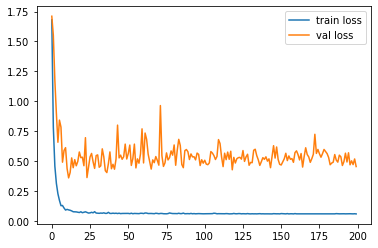

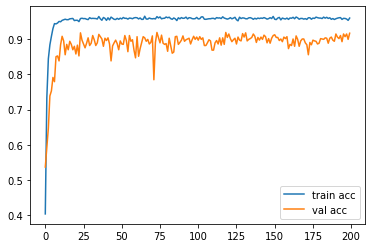

<Figure size 432x288 with 0 Axes>

In [10]:
# plot the loss
import matplotlib.pyplot as plt
history = history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

array(['QHUY_MASK - 19146195'], dtype='<U24')

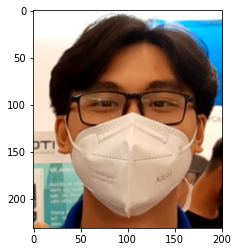

In [11]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/QhuyMask (1).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['QHUY_WITHOUT - 19146195'], dtype='<U24')

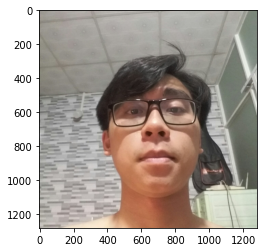

In [12]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/huy0906 (4).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['MTUAN_MASK - 19146297'], dtype='<U24')

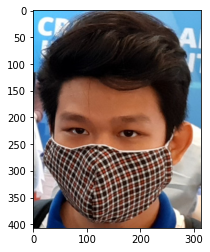

In [15]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/MTuan_Mask.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['MTUAN_WITHOUT - 19146297'], dtype='<U24')

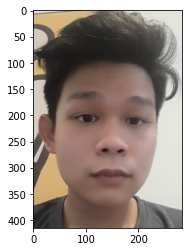

In [18]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (1).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['DTAI_MASK - 19146255'], dtype='<U24')

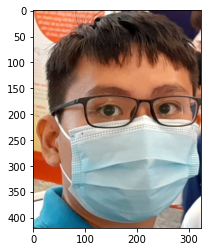

In [21]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/DTai_Mask.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['DTAI_WITHOUT - 19146255'], dtype='<U24')

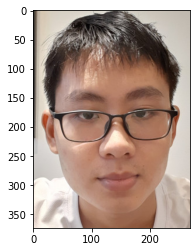

In [23]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (2).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['BHUY_WITHOUT - 19146194'], dtype='<U24')

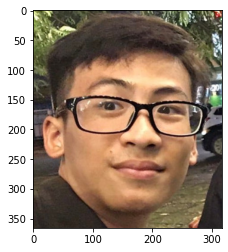

In [24]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/BHuyWithout.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['BHUY_MASK - 19146194'], dtype='<U24')

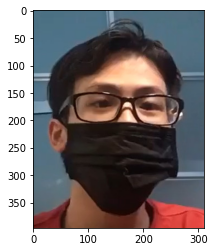

In [26]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/BHuyMask.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['DHUNG_MASK - 19146255'], dtype='<U24')

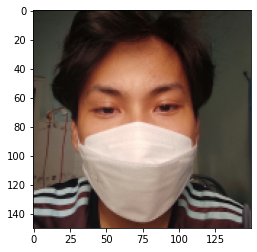

In [27]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/TEST_DATA1/TEST_DATA/HUNGMASK.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['DHUNG_WITHOUT - 19146255'], dtype='<U24')

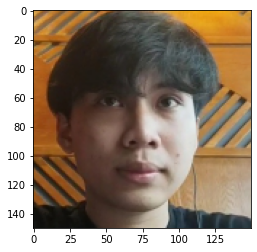

In [28]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/TEST_DATA1/TEST_DATA/HUNG_WITHOUT.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

# 2 MODEL

# Tạo các biến 

In [ ]:
# Important variables 
input_size = [150,150]
batch = 32

input_shape = (150,150,3)
maxpooling_size = (2,2)

# Data preprocessing

# WearMask 

In [ ]:
# WITH MASK
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2,shear_range=0.2, zoom_range = 0.2,)    

train_dataset_wearmask = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_5P_FINAL/WITHMASK',
                                                 shuffle=True,
                                                 target_size= input_size, 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset_wearmask = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_5P_FINAL/WITHMASK',
                                                 shuffle=True,
                                                 target_size=input_size, 
                                                 subset="validation",
                                                 class_mode='categorical')

In [ ]:
train_dataset_wearmask[0][0]

In [ ]:
train_dataset_wearmask.class_indices

# Without Mask

In [ ]:
# WITHOUT MASK 
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2,shear_range=0.2, zoom_range = 0.2,)    

train_dataset_withoutmask = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_5P_FINAL/WITHOUT MASK',
                                                 shuffle=True,
                                                 target_size= input_size, 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset_withoutmask = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_5P_FINAL/WITHOUT MASK',
                                                 shuffle=True,
                                                 target_size=input_size, 
                                                 subset="validation",
                                                 class_mode='categorical')

In [ ]:
train_dataset_withoutmask[0][0]

In [ ]:
train_dataset_withoutmask.class_indices

# Tạo mạng Nơ ron

# Wear mask

In [ ]:
# from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input,MaxPooling2D
mask_model = Sequential()
mask_model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',padding='same', activation='relu', input_shape=(150,150,3)))
#mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
mask_model.add(MaxPooling2D((2,2)))


mask_model.add(Conv2D(128,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
mask_model.add(MaxPooling2D((2,2)))

              
mask_model.add(Conv2D(256,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#mask_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
mask_model.add(MaxPooling2D((2,2)))


# mask_model.add(Conv2D(512, (3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
# mask_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
# mask_model.add(MaxPooling2D((2,2)))


from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

mask_model.add(Flatten())
mask_model.add(Dropout(0.5))
mask_model.add(Dense(128,activation='relu'))
mask_model.add(Dense(512, activation='relu')) 


mask_model.add(Dense(5,activation='softmax', name ='wearmask'))

mask_model.summary()

# Without Mask

In [ ]:
# from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input,MaxPooling2D
withoutmask_model = Sequential()
withoutmask_model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',padding='same', activation='relu', input_shape=(150,150,3)))
#withoutmask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# withoutmask_model.add(MaxPool2D(pool_size=3, strides=2))
withoutmask_model.add(MaxPooling2D((2,2)))

withoutmask_model.add(Conv2D(128,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
withoutmask_model.add(MaxPooling2D((2,2)))

              
withoutmask_model.add(Conv2D(256,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#withoutmask_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# withoutmask_model.add(MaxPool2D(pool_size=3, strides=2))
withoutmask_model.add(MaxPooling2D((2,2)))

# withoutmask_model.add(Conv2D(512, (3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
# withoutmask_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# withoutmask_model.add(MaxPool2D(pool_size=3, strides=2))
# withoutmask_model.add(MaxPooling2D((2,2)))

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
withoutmask_model.add(Flatten())
withoutmask_model.add(Dropout(0.5))
withoutmask_model.add(Dense(128,activation='relu'))
withoutmask_model.add(Dense(512, activation='relu')) 
withoutmask_model.add(Dense(5,activation='softmax', name ='wearmask'))

withoutmask_model.summary()

# TRAIN MODEL

##  WITH MASK 

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
mask_model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])
history_mask=mask_model.fit(train_dataset_wearmask,batch_size=batch,epochs=200, verbose=1,validation_data=validation_dataset_wearmask)

## Save model 1

In [ ]:
mask_model.save('Final_200M2006_2.h5')

## WITHOUT MASK

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
withoutmask_model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])
history_withoutmask=withoutmask_model.fit(train_dataset_withoutmask,batch_size=batch,epochs=200,verbose=1,validation_data=validation_dataset_withoutmask)

## Save model 2

In [ ]:
withoutmask_model.save('Final_200W2006_2.h5')

# PLOT

## With Mask

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
history = history_mask
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Without Mask

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
history = history_withoutmask
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# # plot the loss
# import matplotlib.pyplot as plt
# history = history_stranger
# plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
# plt.legend()
# plt.show()
# plt.savefig('LossVal_loss')

# # plot the accuracy
# plt.plot(history.history['accuracy'], label='train acc')
# plt.plot(history.history['val_accuracy'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (4).jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/HUY_TEST/huy_mm (1)t.jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/huy0906 (4).jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK - 19146194',
 'DHUNG_WITHOUTMASK - 19146016',
 'DTAI_WITHOUTMASK 19146255',
 'MTUAN_WITHOUTMASK -19146297',
 'QHUY_WITHOUTMASK -19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (2).jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK - 19146194',
 'DHUNG_WITHOUTMASK - 19146016',
 'DTAI_WITHOUTMASK 19146255',
 'MTUAN_WITHOUTMASK -19146297',
 'QHUY_WITHOUTMASK -19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (1).jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK - 19146194',
 'DHUNG_WITHOUTMASK - 19146016',
 'DTAI_WITHOUTMASK 19146255',
 'MTUAN_WITHOUTMASK -19146297',
 'QHUY_WITHOUTMASK -19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/QhuyMask (1).jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/MTuan_Mask.jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/DTai_Mask.jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (6).jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (8).jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (3).jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK - 19146194',
 'DHUNG_WITHOUTMASK - 19146016',
 'DTAI_WITHOUTMASK 19146255',
 'MTUAN_WITHOUTMASK -19146297',
 'QHUY_WITHOUTMASK -19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/BHuyWithout.jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK - 19146194',
 'DHUNG_WITHOUTMASK - 19146016',
 'DTAI_WITHOUTMASK 19146255',
 'MTUAN_WITHOUTMASK -19146297',
 'QHUY_WITHOUTMASK -19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/BHuyMask.jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

# 1 MODEL

In [ ]:
# Important variables 
input_size = [150,150]
batch = 32

input_shape = (150,150,3)
maxpooling_size = (2,2)

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2,shear_range=0.2, zoom_range = 0.2,)    

train_dataset = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_10P_FINAL',
                                                 shuffle=True,
                                                 target_size= input_size, 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_10P_FINAL',
                                                 shuffle=True,
                                                 target_size=input_size, 
                                                 subset="validation",
                                                 class_mode='categorical')

In [ ]:
train_dataset.class_indices

In [ ]:
# from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input,MaxPooling2D
model = Sequential()
model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',padding='same', activation='relu', input_shape=(150,150,3)))
#model.add(Conv2D(128, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=3, strides=2))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#model.add(Conv2D(128, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=3, strides=2))
model.add(MaxPooling2D((2,2)))

              
model.add(Conv2D(256,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#model.add(Conv2D(256, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=3, strides=2))
model.add(MaxPooling2D((2,2)))


# model.add(Conv2D(512, (3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
# model.add(Conv2D(512, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=3, strides=2))
# model.add(MaxPooling2D((2,2)))


from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(512, activation='relu')) 


model.add(Dense(10,activation='softmax', name ='wearmask'))

model.summary()

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])
history=model.fit(train_dataset,batch_size=batch,epochs=200, verbose=1,validation_data=validation_dataset)

In [ ]:
model.save('Final_10Main2106.h5')

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
history = history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/QhuyMask (1).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/huy0906 (4).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/MTuan_Mask.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (1).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/DTai_Mask.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (2).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/QhuyMask (1).jpg"

model = model
predict = ['BHUY_MASK',
 'BHUY_WITHOUT',
 'DHUNG_MASK',
 'DHUNG_WITHOUT',
 'DTAI_MASK',
 'DTAI_WITHOUT',
 'MTUAN_MASK',
 'MTUAN_WITHOUT',
 'QHUY_MASK',
 'QHUY_WITHOUT']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/BHuyWithout.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/BHuyMask.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (3).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (8).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]